<a href="https://colab.research.google.com/github/huy20146177/baitapAI/blob/main/baitaptuan5_st2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=91e3ff5ec5ce3aa99542a4356a24ededdc51ccfc5afebdf6a1199b68ef5f81ff
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [14]:
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 


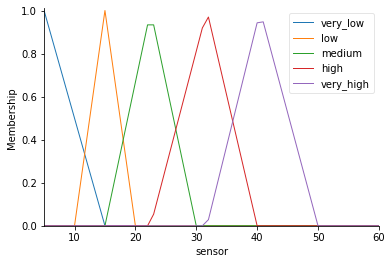

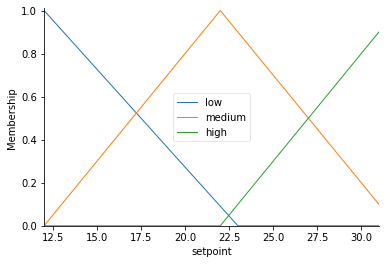

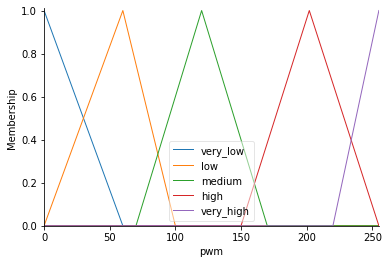

In [20]:
sensor = ctrl.Antecedent(np.arange(5,61,1),'sensor')
setpoint = ctrl.Antecedent(np.arange(12,32,1),'setpoint')
pwm = ctrl.Consequent(np.arange(0,256,1),'pwm')

sensor['very_low']= fuzz.trimf(sensor.universe,[5,5,15])
sensor['low']= fuzz.trimf(sensor.universe,[10,15,20])
sensor['medium']= fuzz.trimf(sensor.universe,[15,22.5,30])
sensor['high']= fuzz.trimf(sensor.universe,[22.5,31.75,40])
sensor['very_high']= fuzz.trimf(sensor.universe,[31.75,40.5,50])

setpoint['low']= fuzz.trimf(setpoint.universe,[12,12,23])
setpoint['medium']= fuzz.trimf(setpoint.universe,[12,22,32])
setpoint['high']= fuzz.trimf(setpoint.universe,[22,32,32])

pwm['very_low']= fuzz.trimf(pwm.universe,[0,0,60])
pwm['low']= fuzz.trimf(pwm.universe,[0,60,100])
pwm['medium']= fuzz.trimf(pwm.universe,[70,120,170])
pwm['high']= fuzz.trimf(pwm.universe,[150,202,255])
pwm['very_high']= fuzz.trimf(pwm.universe,[220,255,255])

sensor.view()
setpoint.view()
pwm.view()



108.97748193513776


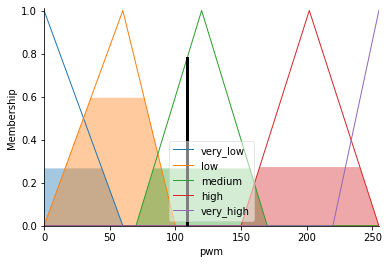

In [21]:
rule1 = ctrl.Rule(sensor['very_low'] & setpoint['low'],pwm['very_low'])
rule2 = ctrl.Rule(sensor['low']      & setpoint['low'],pwm['low'])
rule3 = ctrl.Rule(sensor['medium']   & setpoint['low'],pwm['medium'])
rule4 = ctrl.Rule(sensor['high']     & setpoint['low'],pwm['high'])
rule5 = ctrl.Rule(sensor['very_high']& setpoint['low'],pwm['very_high'])

rule6 = ctrl.Rule(sensor['very_low'] & setpoint['medium'],pwm['low'])
rule7 = ctrl.Rule(sensor['low']      & setpoint['medium'],pwm['very_low'])
rule8 = ctrl.Rule(sensor['medium']   & setpoint['medium'],pwm['very_low'])
rule9 = ctrl.Rule(sensor['high']     & setpoint['medium'],pwm['low'])
rule10 = ctrl.Rule(sensor['very_high']& setpoint['medium'],pwm['medium'])

rule11 = ctrl.Rule(sensor['very_low'] & setpoint['high'],pwm['high'])
rule12 = ctrl.Rule(sensor['low']      & setpoint['high'],pwm['high'])
rule13 = ctrl.Rule(sensor['medium']   & setpoint['high'],pwm['medium'])
rule14 = ctrl.Rule(sensor['high']     & setpoint['high'],pwm['very_low'])
rule15 = ctrl.Rule(sensor['very_high']& setpoint['high'],pwm['low'])


pwmping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
pwmping= ctrl.ControlSystemSimulation(pwmping_ctrl)
pwmping.input['sensor']=28
pwmping.input['setpoint']=20
pwmping.compute()
print(pwmping.output['pwm'])
pwm.view(sim=pwmping)